In [1]:
import sys
sys.path += ["../.."]

import smbh
import numpy as np

from glob import glob

import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [2]:
def rgbToHex(color):
    c = tuple((255 * color[:3]).astype(int))
    return '#%02x%02x%02x' % c

In [3]:
files = sorted(glob("*.dat"))[::-1]

In [4]:
data = [np.genfromtxt(file, skip_header = 1) for file in files]
speeds = [int(file[1:3]) for file in files]

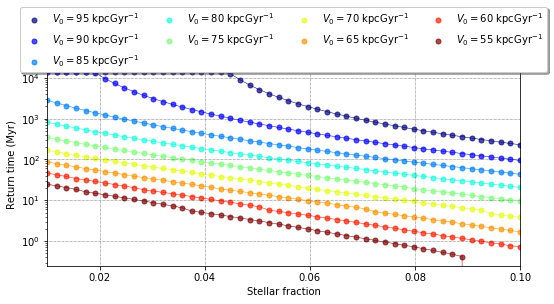

In [5]:
colors = [rgbToHex(color) for color in smbh.getColors(len(files))]

fig, ax = plt.subplots(figsize = (8, 4.5))

for i in range(len(files)):
    v = speeds[i]
    fs, ts, ms = data[i].T
    ts = ts * 1000
    c = colors[i]
    ax.plot(fs, ts, lw = 0.5, c = c)
    ax.scatter(fs, ts, s = 25, alpha = 0.7, label = "$V_0 = %d$ kpcGyr$^{-1}$" % v, c = c)
    
ax.set_xlabel("Stellar fraction")
ax.set_ylabel("Return time (Myr)")
ax.set_xlim(fs[0], fs[-1])
ax.set_yscale("log")
ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, 1.3),
          ncol = 4, fancybox = True, shadow = True)
ax.grid()

fig.tight_layout()
fig.savefig("returntimes_stellar_speed.png", dpi = 300)

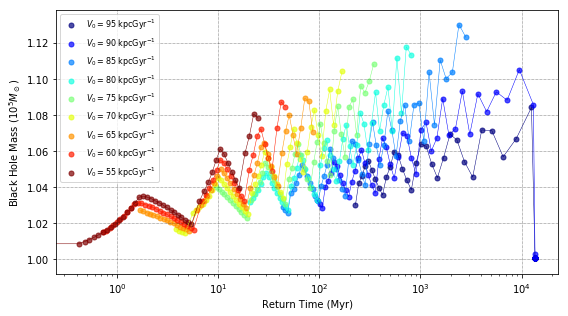

In [6]:
fig, ax = plt.subplots(figsize = (8, 4.5))

for i in range(len(files)):
    v = speeds[i]
    fs, ts, ms = data[i].T
    ts = ts * 1000
    c = colors[i]
    ax.plot(ts, ms, lw = 0.5, c = c)
    ax.scatter(ts, ms, s = 25, alpha = 0.7, label = "$V_0 = %d$ kpcGyr$^{-1}$" % v, c = c)
    
ax.set_ylabel("Black Hole Mass ($10^5 M_\odot$)")
ax.set_xlabel("Return Time (Myr)")

ax.set_xscale("log")
ax.legend(fontsize = 8)
# ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, 1.22),
#           ncol = 4, fancybox = True, shadow = True)
ax.grid()

fig.tight_layout()
fig.savefig("returntimes_mass.png", dpi = 300)

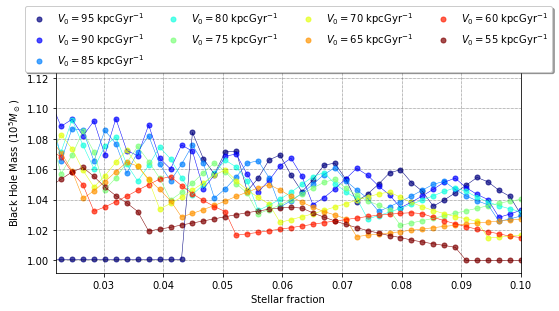

In [7]:
fig, ax = plt.subplots(figsize = (8, 4.5))

for i in range(len(files)):
    v = speeds[i]
    fs, ts, ms = data[i].T
    ts = ts * 1000
    c = colors[i]
    ax.plot(fs, ms, lw = 0.5, c = c)
    ax.scatter(fs, ms, s = 25, alpha = 0.7, label = "$V_0 = %d$ kpcGyr$^{-1}$" % v, c = c)
    
ax.set_ylabel("Black Hole Mass ($10^5 M_\odot$)")
ax.set_xlabel("Stellar fraction")

ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, 1.22),
          ncol = 4, fancybox = True, shadow = True)
ax.grid()

ax.set_xlim(0.022, 0.1)

fig.tight_layout()
# fig.savefig("returntimes_stellar_speed.png", dpi = 300)